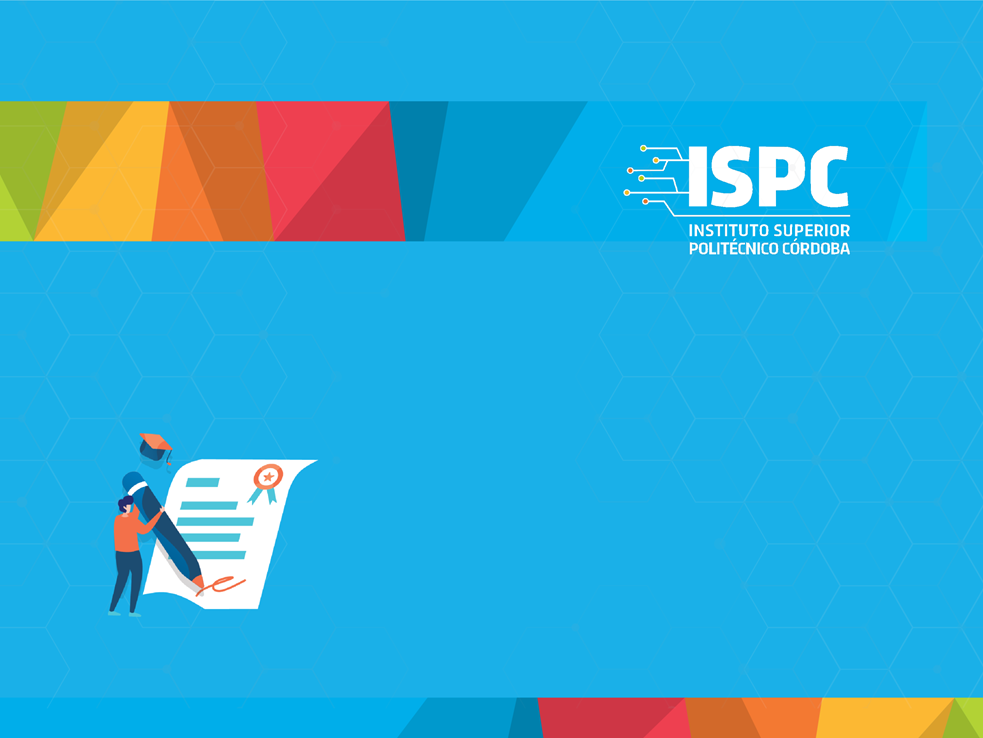

Considérese el modelo de regresión lineal simple:

$$Y=β_0+β_1X_1+ϵ$$

Dada una muestra de entrenamiento, el ajuste de un modelo lineal consiste en encontrar los parámetros estimados (β^0,β^1

) que definen la recta que pasa más cerca de todos los puntos. Para ello se tiene que minimizar la suma de cuadrados residuales:

$$RSS(β_0,β_1)=\sum_{i=1}^{n}(y_i−(β_0+β_1x_i))^2$$

Si bien, para este problema en cuestión, existe una solución explicita con la que obtener el mínimo:

$$\hat{β_1}=\frac{\sum_{i=1}^{n}(x_i−\overline{x})(y_i−\overline{y})}{\sum_{i=1}^{n}(x_i−\overline{x})^2}$$
$$\hat{β_0}=y−β_1\overline{x}$$

en muchos otros casos no existe tal posibilidad, haciendo necesaria la utilización de algoritmos de optimización. La sencillez del problema de regresión lineal simple hace que sea un buen ejemplo para ilustrar cómo se solucionan problemas de optimización. Además, esta función tiene una propiedad muy interesante que facilita mucho su optimización, se trata de una función convexa, por lo que tiene un único mínimo que coincide con el mínimo global.




Fuente:
Correlación lineal y Regresión lineal simple by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/24_correlacion_y_regresion_lineal



# Modelos de Regresión Lineal
## Modelo con datos simulados
* $$y = a + b * x$$


* X : 100 valores distribuídos según una N(1.5, 2.5)


* $$Ye = 5 + 1.9 * x + e$$


* e estará distribuído según una N(0, 0.8)

In [21]:
import pandas as pd
import numpy as np

In [22]:
x = 5 + 1.9 * np.random.randn(20)

In [23]:
res = 0 + 0.1 * np.random.randn(20)

In [24]:
#y_pred
y_pura = 5 + 1.9 * x

In [25]:
#y_act
y_real = 5 + 1.9 * x + res

In [26]:
x_list = x.tolist()
y_pura_list = y_pura.tolist()
y_real_list = y_real.tolist()

In [27]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_real":y_real_list,
        "y_pura":y_pura_list
    }
)

In [28]:
data.head()

,x,y_real,y_pura
0,0.283185,5.510444,5.538052
1,2.720920,10.265126,10.169748
2,5.251309,15.064639,14.977487
3,5.672724,15.564259,15.778176
4,6.658688,17.685588,17.651506


In [29]:
import matplotlib.pyplot as plt

In [30]:
y_mean = [np.mean(y_real) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Real vs Pura')

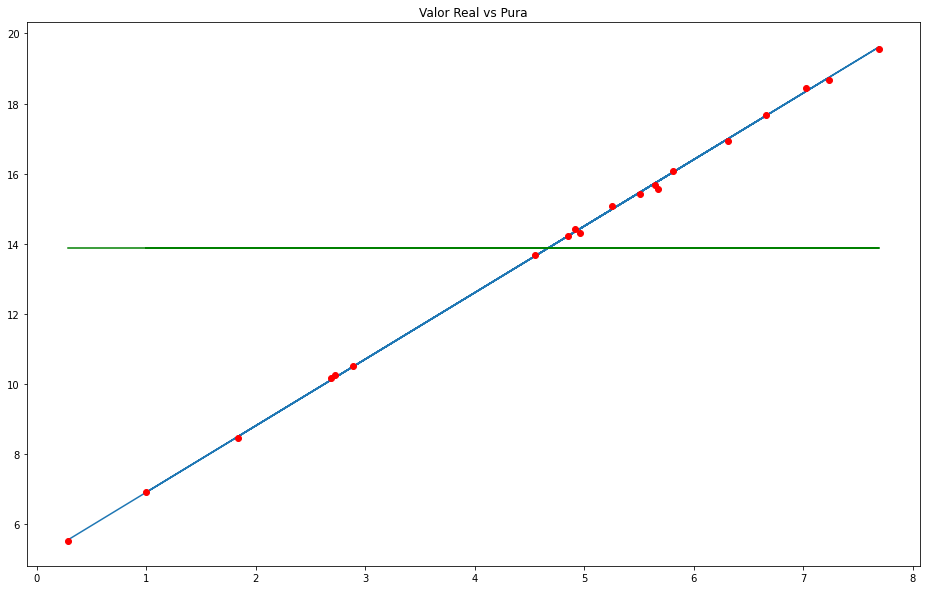

In [31]:
%matplotlib inline
plt.figure(figsize=(16,10))
plt.plot(data["x"],data["y_pura"])
plt.plot(data["x"], data["y_real"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.title("Valor Real vs Pura")

## ¿Como es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [32]:
y_m = np.mean(y_real)
data["SSR"]=(data["y_pura"]-y_m)**2
data["SSD"]=(data["y_pura"]-data["y_real"])**2
data["SST"]=(data["y_real"]-y_m)**2

In [33]:
data.head()

,x,y_real,y_pura,SSR,SSD,SST
0,0.283185,5.510444,5.538052,69.548329,0.000762,70.009566
1,2.720920,10.265126,10.169748,13.748286,0.009097,13.050082
2,5.251309,15.064639,14.977487,1.209716,0.007596,1.409025
3,5.672724,15.564259,15.778176,3.612130,0.045761,2.844763
4,6.658688,17.685588,17.651506,14.242249,0.001162,14.500649


In [34]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [35]:
SSR

303.2154782650755

In [36]:
SSD

0.12099911324521384

In [37]:
SST

301.6784255721488

In [38]:
SSR+SSD

303.3364773783207

In [39]:
R2 = SSR/SST

In [40]:
R2

1.0050950036947839

(array([4., 2., 3., 2., 6., 1., 0., 1., 0., 1.]),
 array([-0.10266154, -0.0710036 , -0.03934566, -0.00768772,  0.02397022,
         0.05562816,  0.0872861 ,  0.11894404,  0.15060198,  0.18225991,
         0.21391785]),
 <BarContainer object of 10 artists>)

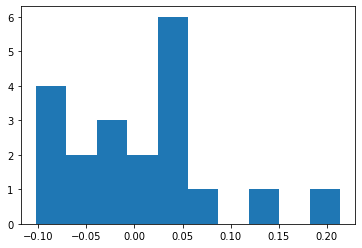

In [41]:
plt.hist(data["y_pura"]-data["y_real"])

## Obteniendo la recta de regresión 

* $$y = a + b * x$$


* $$b = \frac{\sum((xi - x_m)*(y_i-y_m))}{\sum((xi-x_m)^2)}$$


* $$a = y_m - b * x_m$$

In [42]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_real"])
x_mean, y_mean

(4.675453275820738, 13.87761600594786)

In [43]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_real"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [44]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [45]:
alpha = y_mean - beta * x_mean

In [46]:
alpha, beta

(5.018523622872312, 1.894809307343662)

El modelo lineal obtenido por regresión es:
y = 5.042341442370516 + 1.894809307343662 * x

In [57]:
data["y_model"] = alpha + beta * data["x"]

In [48]:
data.head()

,x,y_real,y_pura,SSR,SSD,SST,beta_n,beta_d,y_model
0,0.283185,5.510444,5.538052,69.548329,0.000762,70.009566,36.750862,19.292018,5.555106
1,2.720920,10.265126,10.169748,13.748286,0.009097,13.050082,7.060731,3.820200,10.174148
2,5.251309,15.064639,14.977487,1.209716,0.007596,1.409025,0.683554,0.331610,14.968752
3,5.672724,15.564259,15.778176,3.612130,0.045761,2.844763,1.682040,0.994550,15.767255
4,6.658688,17.685588,17.651506,14.242249,0.001162,14.500649,7.552100,3.933218,17.635467


In [49]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_real"])**2)
SST = sum((data["y_real"]-y_mean)**2)

In [50]:
SSR, SSD, SST

(301.5603496579627, 0.11807591418640259, 301.6784255721488)

In [51]:
R2 = SSR / SST
R2

0.9996086033863305

Text(0.5, 1.0, 'Valor Actual vs Predicción')

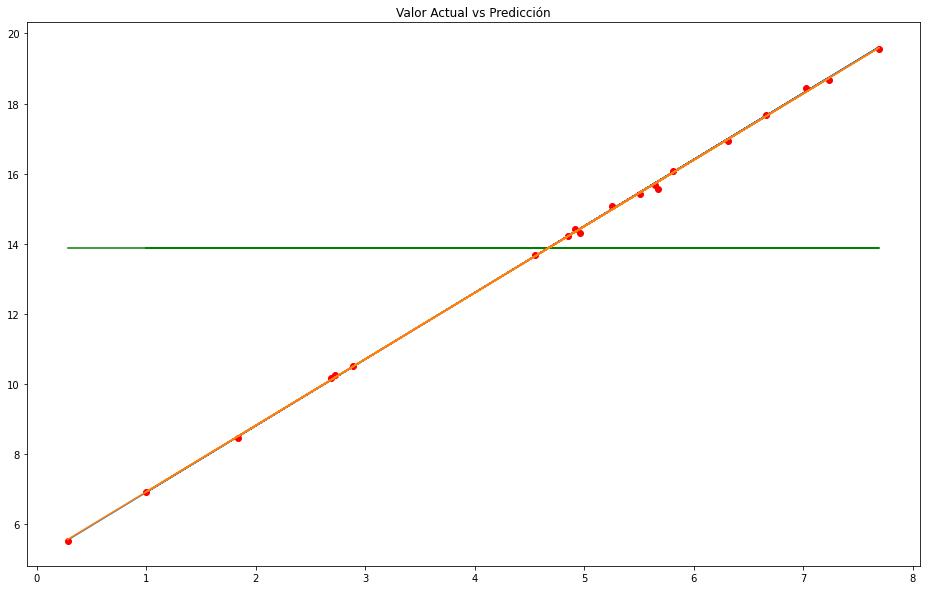

In [52]:
y_mean = [np.mean(y_real) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.figure(figsize=(16,10))
plt.plot(data["x"],data["y_pura"])
plt.plot(data["x"], data["y_real"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [53]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.08099242563570806

In [54]:
np.mean(data["y_real"])

13.87761600594786

In [55]:
RSE / np.mean(data["y_real"])

0.005836191576492332